In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clubbing-finger/Clubbing_t/Screen-Shot-2021-10-26-at-11-18-49-AM_png_jpg.rf.1d19e9649a351c09336f5ca9181766f6.jpg
/kaggle/input/clubbing-finger/Clubbing_t/Screen-Shot-2021-11-22-at-9-09-32-AM_png_jpg.rf.bc79ce24ae662443c9d763151eb92c30.jpg
/kaggle/input/clubbing-finger/Clubbing_t/Screen-Shot-2021-11-22-at-9-58-15-AM_png_jpg.rf.4d5745d96075ebc172c023e030c63cad.jpg
/kaggle/input/clubbing-finger/Clubbing_t/12_PNG_jpg.rf.1c5b558a30bc2fa9a3276ae73fb93947.jpg
/kaggle/input/clubbing-finger/Clubbing_t/Screen-Shot-2021-11-22-at-9-19-19-AM_png_jpg.rf.1031f62c8daf2b991355802919ee183c.jpg
/kaggle/input/clubbing-finger/Clubbing_t/Screen-Shot-2021-11-22-at-9-24-05-AM_png_jpg.rf.a19e044ff1d67a8cf6f13b05e4990b83.jpg
/kaggle/input/clubbing-finger/Clubbing_t/Screen-Shot-2021-11-22-at-9-34-36-AM_png_jpg.rf.f4ef748ccb1a427a046dfebf4e9c96b6.jpg
/kaggle/input/clubbing-finger/Clubbing_t/Screen-Shot-2021-11-22-at-9-12-26-AM_png_jpg.rf.625fc5e8554f4b6e008a3f937786e76a.jpg
/kaggle/input/clubbing-fi

In [ ]:
pip install numpy==1.19.5


In [ ]:
pip install -U tensorflow

In [2]:
pip install -U tensorflow==2.14.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 2.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.7 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 20.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 5.1 MB/s eta 0:00:00:00:01
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 3.1.1
    Uninstalling keras-3.1.1:
      Successfully uninstalled keras-3.1.1
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.0
    Uninstalling google-auth-oauthlib-1.2.0:
      Successfully uninstalled google-auth-oauthlib-1.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15

In [3]:
import tensorflow as tf
print(tf.__version__)

2024-04-19 21:40:08.619033: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-19 21:40:08.619439: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-19 21:40:08.619624: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2.14.1


In [4]:
import os
from PIL import Image
import numpy as np

# Define the root directory containing the folders
root_dir = '/kaggle/input/clubbing-finger'

# Define the folder names
folders = ["Clubbing_t", "Clubbing_tr", "Clubbing_v", "Healthy Nail_t", "Healthy Nail_tr", "Healthy Nail_v"]

# Define arrays to store images and labels
images = []
labels = []

# Iterate over each folder
for folder in folders:
    folder_path = os.path.join(root_dir, folder)
    # Determine the label based on the folder name
    label = 1 if "Clubbing" in folder else 0
    # Iterate over each image in the folder
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        # Open and preprocess the image
        image = Image.open(image_path)
        image = image.resize((128, 128))  # Resize the image if needed
        image = np.array(image)
        # Append the image and label to the arrays
        images.append(image)
        labels.append(label)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Print the length of the image and label arrays
print("train_images shape",images.shape,images.dtype)
print("train_labels shape",labels.shape,labels.dtype)



# Normalize the pixel values to be between 0 and 1
# images =images / 255.0



train_images shape (1480, 128, 128, 3) uint8
train_labels shape (1480,) int64


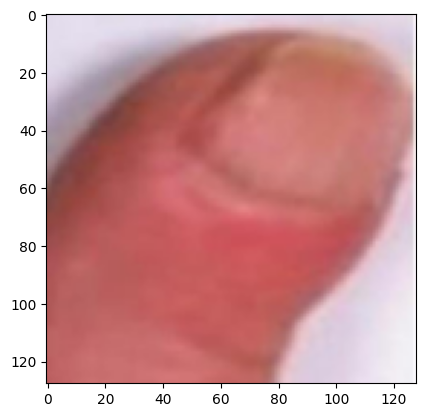

1


In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(images[50])
plt.show()
print(labels[50])

In [7]:
from sklearn.utils import shuffle
images, labels = shuffle(images, labels, random_state=42)

In [8]:
print("images shape:", images.shape)


images shape: (1480, 128, 128, 3)


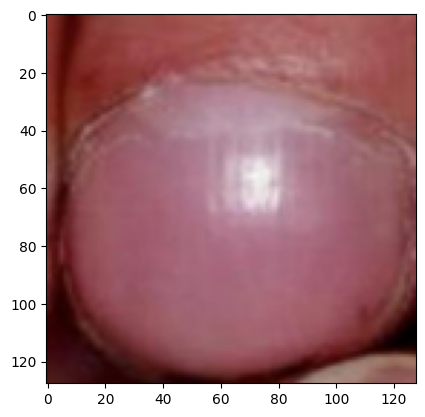

1


In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(images[442])
plt.show()
print(labels[442])

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=2)

In [11]:
print(images.shape, X_train.shape, X_test.shape)
print(labels.shape, y_train.shape, y_test.shape)

X_train = X_train / 255.0
X_test = X_test / 255.0

(1480, 128, 128, 3) (1184, 128, 128, 3) (296, 128, 128, 3)
(1480,) (1184,) (296,)


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with desired augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Function to apply augmentation twice to each dataset
def augment_dataset(dataset):
    augmented_data = []
    for img in dataset:
        img = np.expand_dims(img, axis=0)  # Expanding dimensions for batch size
        for _ in range(3):  # Apply augmentation twice
            seed = np.random.randint(0, 1000)  # Different seed for each pass
            for batch in datagen.flow(img, batch_size=1, seed=seed):
                augmented_data.append(np.squeeze(batch))  # Remove the batch dimension
                break  # Stop the loop after one augmented image
    return np.array(augmented_data)

# Apply augmentation twice to X_train, X_test, and X_val
X_train_augmented = augment_dataset(X_train)
y_train_augmented = np.repeat(y_train, 3 , axis=0)  # Adjust based on augmentation factor


# Check the shapes of augmented datasets
print("X_train_augmented shape:", X_train_augmented.shape)
print("y_train_augmented shape:", y_train_augmented.shape)


X_train_augmented shape: (3552, 128, 128, 3)
y_train_augmented shape: (3552,)


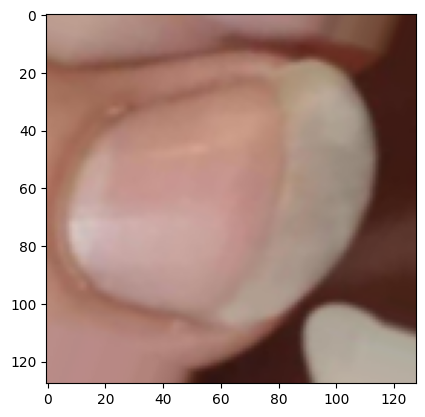

0


In [13]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(X_train_augmented[3200])
plt.show()
print(y_train_augmented[3200])

In [14]:
from sklearn.utils import shuffle

# Combine original data with augmented data
X_train_combined = np.concatenate((X_train, X_train_augmented))
y_train_combined = np.concatenate((y_train, y_train_augmented))


X_train_combined, y_train_combined = shuffle(X_train_combined, y_train_combined, random_state=42)
X_train_combined = np.array(X_train_combined)
y_train_combined = np.array(y_train_combined)

print("X_train_combined shape:", X_train_combined.shape)
y_train_combined = y_train_combined.reshape(-1, 1)
print("X_train_combined shape:", y_train_combined.shape,y_train_combined.dtype)
y_test = y_test.reshape(-1, 1)

print("X_train_combined shape:", y_test.shape,y_test.dtype)

X_train_combined shape: (4736, 128, 128, 3)
X_train_combined shape: (4736, 1) int64
X_train_combined shape: (296, 1) int64


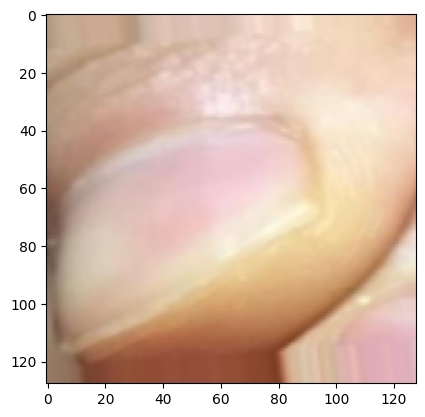

[0]


In [15]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(X_train_combined[3200])
plt.show()
print(y_train_combined[3200])

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
import keras_tuner as kt  # Updated import statement

def build_model(hp):
    vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    
    # Freeze all layers except the last 4 convolutional blocks
#     for layer in vgg_base.layers:
#         layer.trainable = True
    for layer in vgg_base.layers:
        layer.trainable = True
    
    model = models.Sequential()
    model.add(vgg_base)
    model.add(layers.Flatten())
    
    # Tune FC layer units and dropout rate
    model.add(layers.Dense(units=hp.Int('units', min_value=64, max_value=1024, step=32), activation='relu'))
    model.add(layers.Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.9, step=0.1)))
    model.add(layers.Dense(units=hp.Int('units', min_value=64, max_value=1024, step=32), activation='relu'))
    model.add(layers.Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.9, step=0.1)))
    model.add(layers.Dense(units=hp.Int('units', min_value=64, max_value=1024, step=32), activation='relu'))
    model.add(layers.Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.9, step=0.1)))
    
    # Output layer with sigmoid activation for binary classification
    model.add(layers.Dense(1, activation='sigmoid'))
    
#     optimizer = hp.Choice(name='optimizer',values=['rmsprop','adam','adagrad','sgd','adadelta'])
    metrics = [
        'accuracy',
        tf.keras.metrics.AUC(),
#         tf.keras.metrics.Accuracy(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.SpecificityAtSensitivity(0.5),
        tf.keras.metrics.SensitivityAtSpecificity(0.5),
        tf.keras.metrics.FalseNegatives(),
        tf.keras.metrics.FalsePositives(),
        tf.keras.metrics.TrueNegatives(),
        tf.keras.metrics.TruePositives(),
        tf.keras.metrics.F1Score()
    ]
    model.compile(
        optimizer = 'adam',
#         loss =  "sparse_categorical_crossentropy",
        loss='binary_crossentropy',
        metrics=metrics
        
    )
    
    return model


In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
import keras_tuner as kt  # Updated import statement

def build_model(hp):
    res_base =ResNet50 (weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    
    # Freeze all layers except the last 4 convolutional blocks
    for layer in res_base.layers:
        layer.trainable = True
#     res_base.trainable= True
    
    model = models.Sequential()
    model.add(res_base)
    model.add(layers.Flatten())
    
     # Tune FC layer units and dropout rate
    model.add(layers.Dense(units=hp.Int('units', min_value=64, max_value=1024, step=32), activation='relu'))
    model.add(layers.Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.9, step=0.1)))
    model.add(layers.Dense(units=hp.Int('units', min_value=64, max_value=1024, step=32), activation='relu'))
    model.add(layers.Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.9, step=0.1)))
    model.add(layers.Dense(units=hp.Int('units', min_value=64, max_value=1024, step=32), activation='relu'))
    model.add(layers.Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.9, step=0.1)))
    
    # Output layer with sigmoid activation for binary classification
    model.add(layers.Dense(1, activation='sigmoid'))
    
#     optimizer = hp.Choice(name='optimizer',values=['rmsprop','adam','adagrad','sgd','adadelta'])
    metrics = [
        'accuracy',
        tf.keras.metrics.AUC(),
#         tf.keras.metrics.Accuracy(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.SpecificityAtSensitivity(0.5),
        tf.keras.metrics.SensitivityAtSpecificity(0.5),
        tf.keras.metrics.FalseNegatives(),
        tf.keras.metrics.FalsePositives(),
        tf.keras.metrics.TrueNegatives(),
        tf.keras.metrics.TruePositives(),
        tf.keras.metrics.F1Score()

    ]
    model.compile(
        optimizer = 'adam',
#         loss =  "sparse_categorical_crossentropy",
        loss='binary_crossentropy',
        metrics=metrics
        
    )
    
    return model


In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG19
import kerastuner as kt

def build_model(hp):
    google_base = VGG19(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    
    # Freeze all layers except the last 4 convolutional blocks
    for layer in google_base.layers:
        layer.trainable = False
#     res_base.trainable= True
    
    model = models.Sequential()
    model.add(google_base)
    model.add(layers.Flatten())
    
     # Tune FC layer units and dropout rate
    model.add(layers.Dense(units=hp.Int('units', min_value=64, max_value=1024, step=32), activation='relu'))
    model.add(layers.Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.9, step=0.1)))
    model.add(layers.Dense(units=hp.Int('units', min_value=64, max_value=1024, step=32), activation='relu'))
    model.add(layers.Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.9, step=0.1)))
    model.add(layers.Dense(units=hp.Int('units', min_value=64, max_value=1024, step=32), activation='relu'))
    model.add(layers.Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.9, step=0.1)))
    
    # Output layer with sigmoid activation for binary classification
    model.add(layers.Dense(1, activation='sigmoid'))
    
#     optimizer = hp.Choice(name='optimizer',values=['rmsprop','adam','adagrad','sgd','adadelta'])
    metrics = [
        'accuracy',
        tf.keras.metrics.AUC(),
#         tf.keras.metrics.Accuracy(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.SpecificityAtSensitivity(0.5),
        tf.keras.metrics.SensitivityAtSpecificity(0.5),
        tf.keras.metrics.FalseNegatives(),
        tf.keras.metrics.FalsePositives(),
        tf.keras.metrics.TrueNegatives(),
        tf.keras.metrics.TruePositives(),
        tf.keras.metrics.F1Score()

    ]
    model.compile(
        optimizer = 'adam',
#         loss =  "sparse_categorical_crossentropy",
        loss='binary_crossentropy',
        metrics=metrics
        
    )
    
    return model


/tmp/ipykernel_904/3237192112.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [17]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import Xception
import kerastuner as kt

def build_model(hp):
    google_base = Xception(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    
    # Freeze all layers except the last 4 convolutional blocks
    for layer in google_base.layers:
        layer.trainable = False
#     res_base.trainable= True
    
    model = models.Sequential()
    model.add(google_base)
    model.add(layers.Flatten())
    
     # Tune FC layer units and dropout rate
    model.add(layers.Dense(units=hp.Int('units', min_value=64, max_value=1024, step=32), activation='relu'))
    model.add(layers.Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.9, step=0.1)))
    model.add(layers.Dense(units=hp.Int('units', min_value=64, max_value=1024, step=32), activation='relu'))
    model.add(layers.Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.9, step=0.1)))
    model.add(layers.Dense(units=hp.Int('units', min_value=64, max_value=1024, step=32), activation='relu'))
    model.add(layers.Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.9, step=0.1)))
    
    # Output layer with sigmoid activation for binary classification
    model.add(layers.Dense(1, activation='sigmoid'))
    
#     optimizer = hp.Choice(name='optimizer',values=['rmsprop','adam','adagrad','sgd','adadelta'])
    metrics = [
        'accuracy',
        tf.keras.metrics.AUC(),
#         tf.keras.metrics.Accuracy(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.SpecificityAtSensitivity(0.5),
        tf.keras.metrics.SensitivityAtSpecificity(0.5),
        tf.keras.metrics.FalseNegatives(),
        tf.keras.metrics.FalsePositives(),
        tf.keras.metrics.TrueNegatives(),
        tf.keras.metrics.TruePositives(),
        tf.keras.metrics.F1Score()

    ]
    model.compile(
        optimizer = 'adam',
#         loss =  "sparse_categorical_crossentropy",
        loss='binary_crossentropy',
        metrics=metrics
        
    )
    
    return model


/tmp/ipykernel_33/804268597.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [18]:
from tensorflow import keras
from tensorflow.keras import layers
import kerastuner as kt

objective = kt.Objective(
name="val_accuracy",
direction="max")

tuner = kt.GridSearch(
    build_model,
    objective=objective,
    max_trials = 5,
    executions_per_trial=3,
    directory="mnist_kt_test",
    overwrite=True,
)

tuner.search_space_summary()
tuner.search(X_train_combined, y_train_combined.astype('float32'), epochs=3,validation_split=0.2)


Trial 5 Complete [00h 24m 39s]
val_accuracy: 0.744022528330485

Best val_accuracy So Far: 0.9349507490793864
Total elapsed time: 02h 04m 54s


In [19]:
best_hp = tuner.get_best_hyperparameters()[0]
print(best_hp)
best_model = tuner.hypermodel.build(best_hp)


In [20]:
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 4, 4, 2048)        20861480  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                2097216   
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [21]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('clubbing_res50_not-fined.h5',save_best_only=True),
    tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',patience=32
    )
]
history = best_model.fit(X_train_combined, y_train_combined.astype('float32'), epochs=100,batch_size=32,validation_split=0.2,callbacks=callbacks)

Epoch 1/100
119/119 [==============================] - ETA: 0s - loss: 0.3935 - accuracy: 0.8398 - auc_1: 0.9140 - recall_1: 0.8397 - precision_1: 0.8579 - specificity_at_sensitivity_1: 0.9784 - sensitivity_at_specificity_1: 0.9620 - false_negatives_1: 325.0000 - false_positives_1: 282.0000 - true_negatives_1: 1479.0000 - true_positives_1: 1702.0000 - f1_score: 0.6972

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


119/119 [==============================] - 166s 1s/step - loss: 0.3935 - accuracy: 0.8398 - auc_1: 0.9140 - recall_1: 0.8397 - precision_1: 0.8579 - specificity_at_sensitivity_1: 0.9784 - sensitivity_at_specificity_1: 0.9620 - false_negatives_1: 325.0000 - false_positives_1: 282.0000 - true_negatives_1: 1479.0000 - true_positives_1: 1702.0000 - f1_score: 0.6972 - val_loss: 0.2300 - val_accuracy: 0.9008 - val_auc_1: 0.9757 - val_recall_1: 0.9606 - val_precision_1: 0.8752 - val_specificity_at_sensitivity_1: 1.0000 - val_sensitivity_at_specificity_1: 0.9962 - val_false_negatives_1: 21.0000 - val_false_positives_1: 73.0000 - val_true_negatives_1: 342.0000 - val_true_positives_1: 512.0000 - val_f1_score: 0.7198
Epoch 2/100
119/119 [==============================] - 148s 1s/step - loss: 0.2056 - accuracy: 0.9168 - auc_1: 0.9740 - recall_1: 0.9225 - precision_1: 0.9221 - specificity_at_sensitivity_1: 0.9960 - sensitivity_at_specificity_1: 0.9961 - false_negatives_1: 157.0000 - false_positives

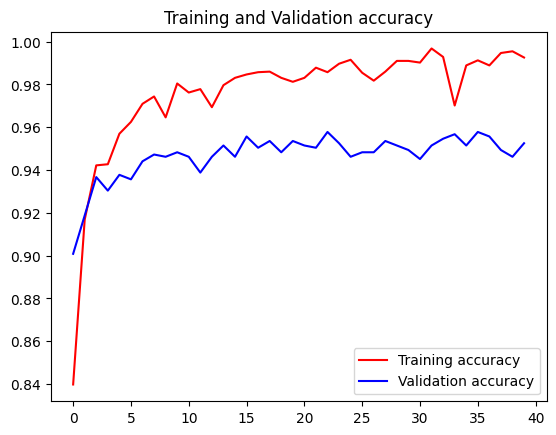

<Figure size 640x480 with 0 Axes>

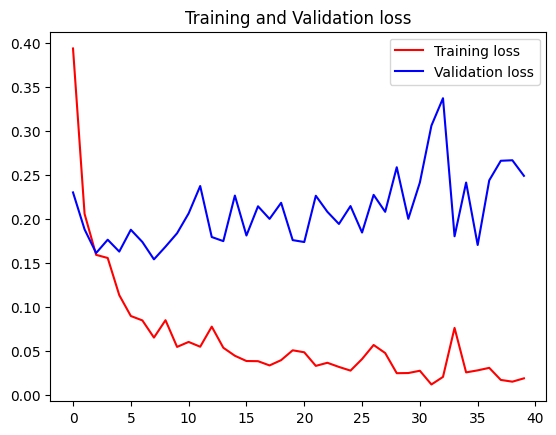

<Figure size 640x480 with 0 Axes>

In [22]:
acc = history.history['accuracy']
val_acc= history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'r',label="Training accuracy")
plt.plot(epochs,val_acc,'b',label="Validation accuracy")
plt.title('Training and Validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.title('Training and Validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [23]:
# Check the shapes and data types of X_test and y_test
y_test = y_test.astype('float32')
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("X_test data type:", X_test.dtype)
print("y_test data type:", y_test.dtype)

# Evaluate the model on the test data
evaluation = best_model.evaluate(X_test, y_test.astype('float32'))
print("Evaluation results:", evaluation)


X_test shape: (296, 128, 128, 3)
y_test shape: (296, 1)
X_test data type: float64
y_test data type: float32
10/10 [==============================] - 9s 866ms/step - loss: 0.2341 - accuracy: 0.9561 - auc_1: 0.9845 - recall_1: 0.9483 - precision_1: 0.9763 - specificity_at_sensitivity_1: 1.0000 - sensitivity_at_specificity_1: 0.9770 - false_negatives_1: 9.0000 - false_positives_1: 4.0000 - true_negatives_1: 118.0000 - true_positives_1: 165.0000 - f1_score: 0.8398
Evaluation results: [0.23413418233394623, 0.9560810923576355, 0.9844545125961304, 0.9482758641242981, 0.976331353187561, 1.0, 0.977011501789093, 9.0, 4.0, 118.0, 165.0, array([0.8398058], dtype=float32)]


In [42]:
import tensorflow as tf

# Assuming you have your trained model stored in the variable 'model'

# Save the model to an h5 file
model.save('"best_model of clubbing_nail.h5')

# Load the model later for prediction or further training
loaded_model = tf.keras.models.load_model('"best_model of clubbing_nail.h5')


In [27]:
import cv2
import numpy as np

# Load the image
image_path = "/kaggle/input/clubbing-finger/Healthy Nail_t/h178_png_jpg.rf.05062dab9f2df7e26e9291ab5fd45b82.jpg"
image = cv2.imread(image_path)

# Preprocess the image to match the input shape of your model
# For example, resize the image to 128x128 and normalize pixel values
processed_image = cv2.resize(image, (128, 128))
processed_image = processed_image.astype('float32') / 255.0
processed_image = np.expand_dims(processed_image, axis=0)  # Add batch dimension

# Use your trained model to make predictions
predictions = best_model.predict(processed_image)

# Print the predicted value
print("Predicted value:", predictions)
# Define a threshold value
threshold = 0.5  # Adjust this threshold based on your model's performance

# Convert the predicted value to the corresponding class label
predicted_class = 1 if predictions > threshold else 0

# Map the class label to the actual class names
class_names = {0: "Normal", 1: "Clubbing"}
predicted_class_name = class_names[predicted_class]

# Print the predicted class name
print("Predicted class:", predicted_class_name)


1/1 [==============================] - 1s 1s/step
Predicted value: [[2.7410355e-10]]
Predicted class: Normal
